In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

In [2]:
## loading the data

df = pd.read_csv("~/Desktop/dqr_automate/NY property data.csv/NY property data.csv")

In [3]:
## loading the data

#df = pd.read_csv("~/Desktop/dqr_automate/l1_data.csv")
#df = df.assign(output_yes = np.random.randint(low = 0, high = 2, size = df.shape[0]))

#resp = "physician_efficiency"
# resp = "output_yes"
# descriptors = ['physician_id']

In [ ]:
descriptors = ['RECORD', 'BBLE']
resp = None
size = 100
nint = 20 # threshold lower than which variable would be treated as categorical
nchar = 25 #threshold of string length for a level name, lower which graph would be tightly laid out

def dqr(resp, descriptors, df, size = 100, nint = 20, nchar = 25):

    mpl.rcParams["figure.dpi"] = size

    print("The data set contains ", len(df), " records/rows.")
    print(len(df.columns), " columns are available")
    
    # Little cumbersome way to index/slice:
    #temp = []
    #for i in df.index:    
        #temp.append(1 if np.sum(df.iloc[i, :].isna()) > 0 else 0)

    #print("The data set contains ", np.sum(temp), " rows/records that have NaNs")

    if resp:
        print("Response variable is ", resp)
        print("Number of explanatory variables to consider is ", len(df.columns) - 1)
        response = df.pop(resp)
        df = pd.concat([response, df], axis = 1)
    else:
        print("No response variable.")
        print("Number of explanatory variables to consider is ", len(df.columns))

    for i in range(len(df.columns)):    
        print("\n+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-\n")

        print("\nColumn ", df.columns[i], "\n")
        # if variable is a descriptor/index variable for records/rows
        if df.columns[i] in descriptors:
            print("Number of NaNs: ", np.sum(df[df.columns[i]].isna()))
            print("Datatype (as given): ", df[df.columns[i]].dtype)
        else:
            print("Number of NaNs: ", np.sum(df[df.columns[i]].isna())) 
            print("Datatype (as given): ", df[df.columns[i]].dtype)

            if pd.api.types.is_object_dtype(df[df.columns[i]].infer_objects().dtype) and df[df.columns[i]][1:].apply(len).mean() < nchar:
                print("Datatype (recommended): CategoricalDtype()")
                test = df[df.columns[i]].astype('category')

            elif pd.api.types.is_numeric_dtype(df[df.columns[i]]) and df[df.columns[i]].nunique() < nint:
                print("Datatype (recommended): CategoricalDtype()")
                test = df[df.columns[i]].astype('category')

            else:
                print("Datatype (recommended): ", df[df.columns[i]].infer_objects().dtype)
                test = df[df.columns[i]].convert_dtypes()

            if pd.api.types.is_numeric_dtype(test):
                print("\nDescriptive Statistics:")
                print(test.describe())
                
                if resp:
                    nrows = 1
                    ncols = 2

                if resp == None or resp == np.NaN:
                    nrows = 1
                    ncols = 1
                    
                fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(10, 2))
                plt.subplots_adjust(wspace=0.25, hspace=0.3)
                sns.histplot(x = test, ax= axes[0] if resp else None)
                if resp and response.nunique() > 2:
                    sns.scatterplot(data = df, x = test, y = response, ax= axes[1] if resp else None)
                elif resp and response.nunique() == 2:
                    plot = sns.lineplot(data = df, x = test.astype('float'), y = response, estimator = 'mean', ax= axes[1] if resp else None, ci = None)                    
                    plot.set(ylabel="Mean " + resp)
                plt.show()

            else:
                print("\nCount/frequency of levels:")
                print(test.value_counts())

                if test.nunique() > nint:
                    
                    if resp:
                        nrows = 2
                        ncols = 1                   
                    
                    if resp == None or resp == np.NaN:
                        nrows = 1
                        ncols = 1

                    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(10, 8))
                    plt.subplots_adjust(wspace=0.25, hspace=0.3)
                    from matplotlib.pyplot import MultipleLocator
                    plot = test.value_counts().sort_values().plot(kind = 'barh', ax= axes[0] if resp else None)
                    plot.set(xlabel = "Frequency")
                    plot.set(ylabel = df.columns[i])
                    y_major_locator = MultipleLocator(5)
                    y_major_locator.view_limits(dmin  = 1, dmax = df[df.columns[i]].nunique())
                    plot.yaxis.set_major_locator(y_major_locator)                    
                    plt.tight_layout()
                    
                    if resp:
                        grp_order = df.groupby(df.columns[i])[resp].agg('mean').sort_values(ascending = False).index                    
                        plot = sns.barplot(data = df, y = test, x = response, color = 'orange', ci = None, ax= axes[1] if resp else None, order = grp_order)
                        plot.set(xlabel="Mean " + resp)
                        plot.set(ylabel = df.columns[i])
                        y_major_locator = MultipleLocator(5)
                        y_major_locator.view_limits(dmin  = 1, dmax = df[df.columns[i]].nunique())
                        plot.yaxis.set_major_locator(y_major_locator)                    
                        plt.tight_layout()
                    
                    plt.show()

                else:
                    
                    if resp:
                        nrows = 1
                        ncols = 2
                    
                    if resp == None or resp == np.NaN:
                        nrows = 1
                        ncols = 1
                    
                    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(10, 2))
                    plt.subplots_adjust(wspace=1, hspace=0.3)
                    plot = test.value_counts().sort_values().plot(kind = 'barh', ax= axes[0] if resp else None)
                    plot.set(xlabel = "Frequency")
                    plot.set(ylabel = df.columns[i])

                    if resp:
                        grp_order = df.groupby(df.columns[i])[resp].agg('mean').sort_values(ascending = False).index
                        plot = sns.barplot(data = df, y = test, x = response, color = 'orange', ci = None, ax= axes[1] if resp else None, order = grp_order)
                        plot.set(xlabel="Mean " + resp)
                        plot.set(ylabel = df.columns[i])
                    
                    plt.show()

In [ ]:
dqr(resp = resp, descriptors = descriptors, df = df, size = 100, nint = 20, nchar = 25)

(0.0, 500.0)

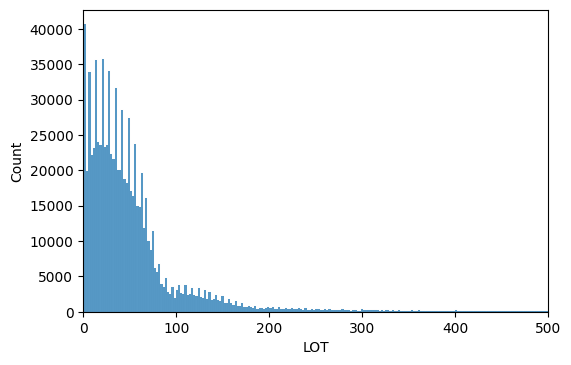

In [9]:
sns.histplot(x = df.LOT)
plt.xlim(0, 500)

(0.0, 2000.0)

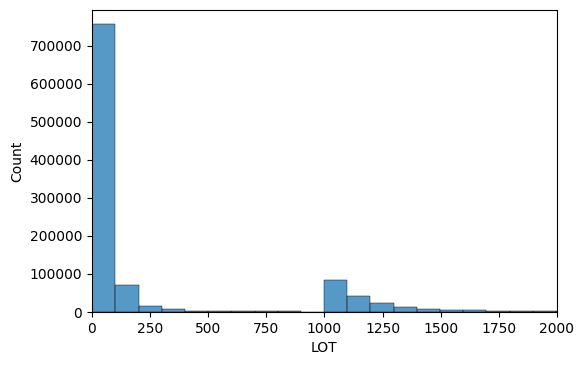

In [10]:
sns.histplot(x = df.LOT, bins = 100)
plt.xlim(0, 2000)

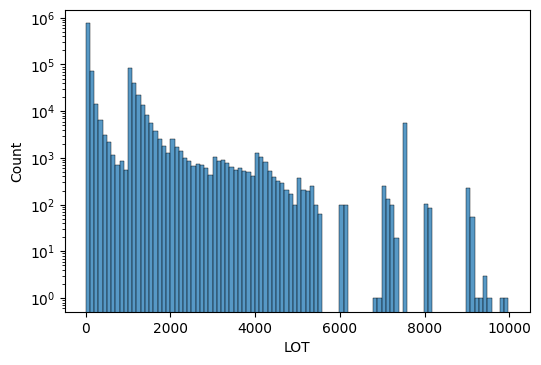

In [15]:
ax = sns.histplot(x = df.LOT, bins = 100)
ax.set_yscale('log')

In [18]:
df.OWNER.value_counts().head(15)

PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
DEPT OF ENVIRONMENTAL    1166
BOARD OF EDUCATION       1015
NEW YORK CITY HOUSING    1014
CNY/NYCTA                 975
NYC HOUSING PARTNERSH     747
YORKVILLE TOWERS ASSO     558
DEPARTMENT OF BUSINES     527
DEPT OF TRANSPORTATIO     503
MTA/LIRR                  467
PARCKHESTER PRESERVAT     439
Name: OWNER, dtype: int64

(0.0, 500.0)

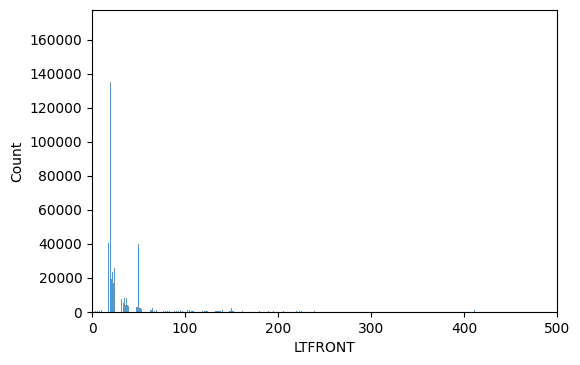

In [20]:
sns.histplot(x = df.LTFRONT)
plt.xlim(0, 500)

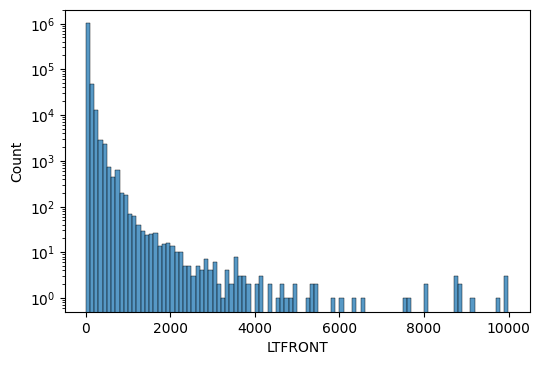

In [21]:
ax = sns.histplot(x = df.LTFRONT, bins = 100)
ax.set_yscale('log')

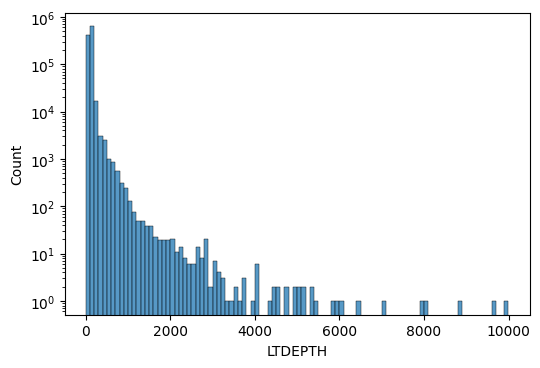

In [22]:
ax = sns.histplot(x = df.LTDEPTH, bins = 100)
ax.set_yscale('log')

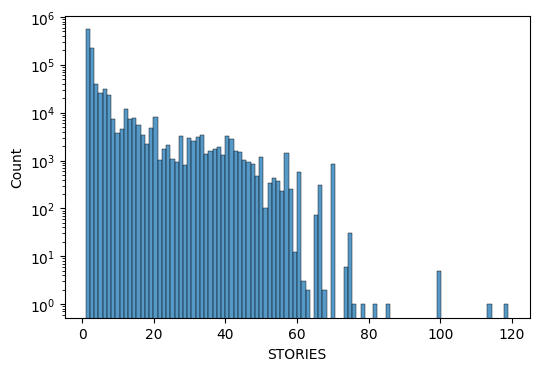

In [23]:
ax = sns.histplot(x = df.STORIES, bins = 100)
ax.set_yscale('log')

(0.0, 2500000000.0)

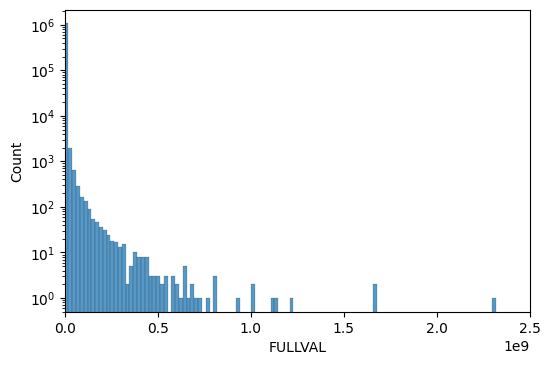

In [45]:
ax = sns.histplot(x = df.FULLVAL, bins = 300)
ax.set_yscale('log')
plt.xlim(0, 2.5e9)

In [26]:
df.FULLVAL.describe()

count    1.070994e+06
mean     8.742645e+05
std      1.158243e+07
min      0.000000e+00
25%      3.040000e+05
50%      4.470000e+05
75%      6.190000e+05
max      6.150000e+09
Name: FULLVAL, dtype: float64

In [28]:
np.nanmean(df.FULLVAL < 2.5e9)

0.9999971988638592

(0.0, 200000000.0)

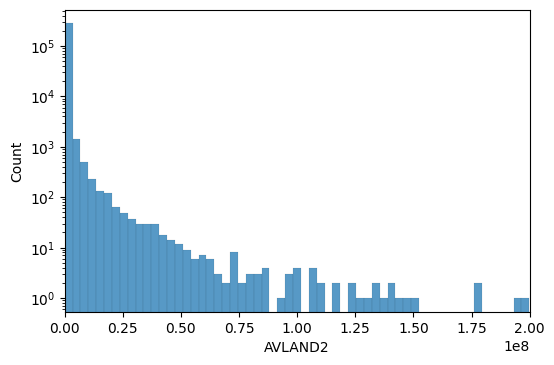

In [92]:
ax = sns.histplot(x = df.AVLAND2, bins = 700)
ax.set_yscale('log')
plt.xlim(0, 2e8)

In [106]:
np.sum(df.AVLAND2 < 2.5e8) / (len(df) - 788268)

0.9999787780395153

In [82]:
df.AVLAND2.describe()

count    2.827260e+05
mean     2.462357e+05
std      6.178963e+06
min      3.000000e+00
25%      5.705000e+03
50%      2.014500e+04
75%      6.264000e+04
max      2.371005e+09
Name: AVLAND2, dtype: float64

(0.0, 400000000.0)

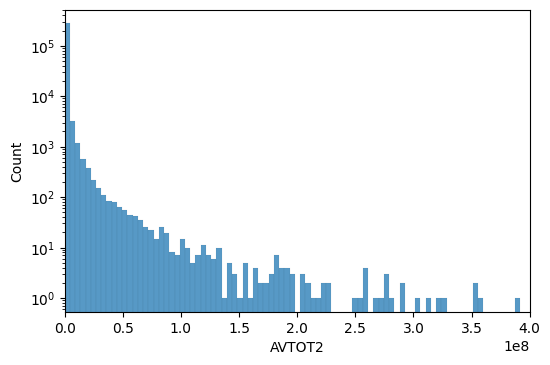

In [93]:
ax = sns.histplot(x = df.AVTOT2, bins = 1000)
ax.set_yscale('log')
plt.xlim(0, 0.4e9)

In [103]:
np.sum(df.AVTOT2 < 0.4e9) / (len(df) - 788268)

0.9999893890197576

In [99]:
np.quantile(df.AVTOT2, 0.99)

In [107]:
df.AVTOT2.describe()

count    2.827320e+05
mean     7.139114e+05
std      1.165253e+07
min      3.000000e+00
25%      3.391200e+04
50%      7.996250e+04
75%      2.405510e+05
max      4.501180e+09
Name: AVTOT2, dtype: float64

In [101]:
np.nanmean(df.AVTOT2 < 4501180002.0)

0.2639893407432721

(0.0, 250000000.0)

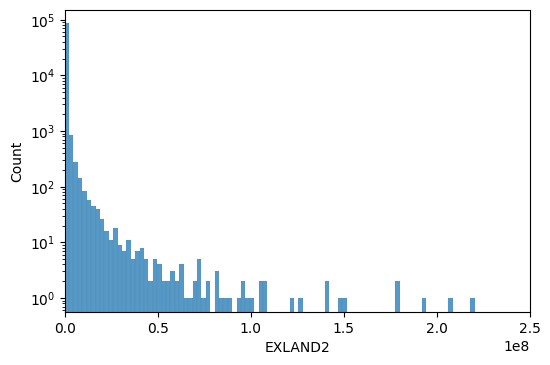

In [111]:
ax = sns.histplot(x = df.EXLAND2, bins = 1000)
ax.set_yscale('log')
plt.xlim(0, 0.25e9)

In [55]:
np.nanmean(df.EXLAND < 0.5e9)

0.9999953314397653

In [108]:
df.EXLAND2.describe()

count    8.744900e+04
mean     3.512357e+05
std      1.080221e+07
min      1.000000e+00
25%      2.090000e+03
50%      3.048000e+03
75%      3.177900e+04
max      2.371005e+09
Name: EXLAND2, dtype: float64

In [112]:
df.EXTOT.describe()

count    1.070994e+06
mean     9.118698e+04
std      6.508403e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.620000e+03
75%      2.090000e+03
max      4.668309e+09
Name: EXTOT, dtype: float64

(0.0, 250000000.0)

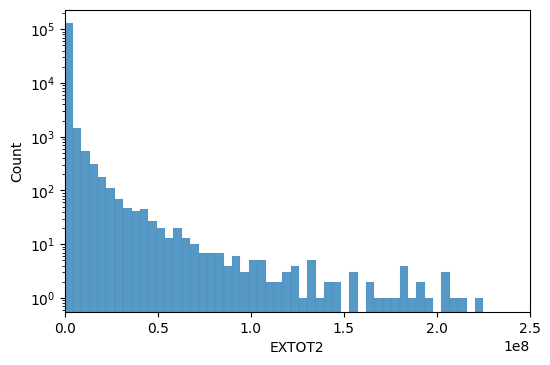

In [113]:
ax = sns.histplot(x = df.EXTOT2, bins = 1000)
ax.set_yscale('log')
plt.xlim(0, 0.25e9)

In [56]:
df.EXCD1.describe()

count    638488.000000
mean       1602.014232
std        1384.226741
min        1010.000000
25%        1017.000000
50%        1017.000000
75%        1017.000000
max        7170.000000
Name: EXCD1, dtype: float64

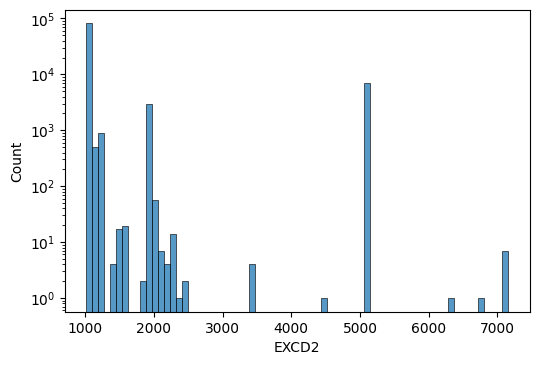

In [114]:
ax = sns.histplot(x = df.EXCD2, bins = 70)
ax.set_yscale('log')
#plt.xlim(0, 0.5e9)

In [ ]:
np.nanmean(df.EXLAND < 0.5e9)

(10000.0, 12000.0)

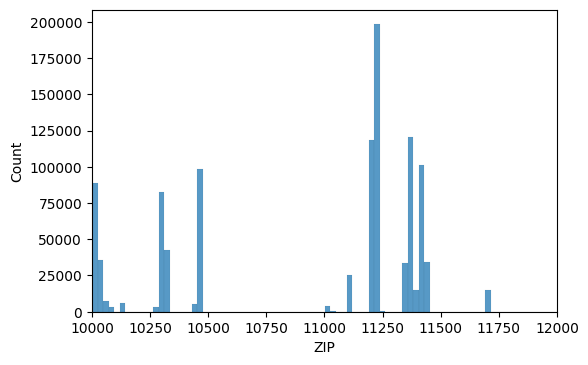

In [70]:
ax = sns.histplot(x = df.ZIP, bins = 1000)
#ax.set_yscale('log')
plt.xlim(10000, 12000)

In [75]:
np.nanmean(df.ZIP.isin(np.arange(10000, 12000, 1)))

0.9720885457808354

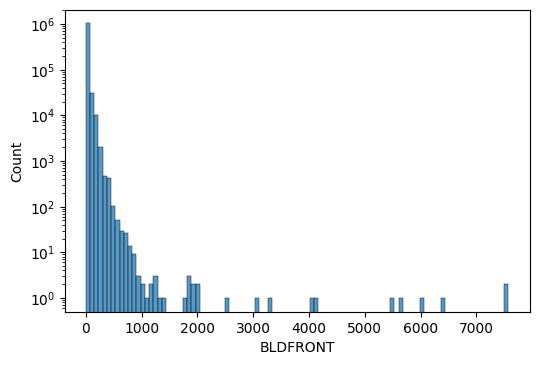

In [77]:
ax = sns.histplot(x = df.BLDFRONT, bins = 100)
ax.set_yscale('log')

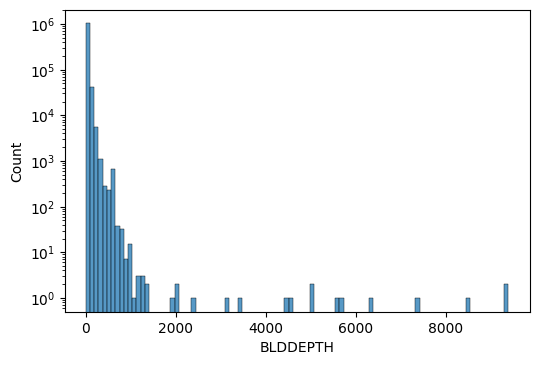

In [78]:
ax = sns.histplot(x = df.BLDDEPTH, bins = 100)
ax.set_yscale('log')

Text(0, 0.5, 'B')

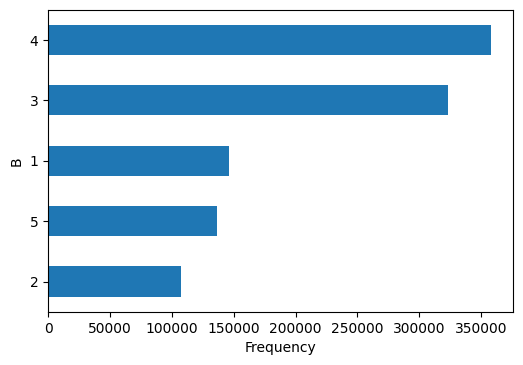

In [118]:
df.B.value_counts().sort_values().plot(kind = 'barh')
plt.xlabel("Frequency")
plt.ylabel("B")